# VISp and VISpm


## Team Member Names & Contributions


- **Yudi Hu**: (PID A13488186)
- **Lauren Hui**: (PID A14697567)
- **Sunnie Hong**: abstract, background, question, editing code, Cell Types wrangling and analysis, Cell Types graphs, discussion, conclusion (PID A13527409)

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

## Setup

Importing packages needed for the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
import xarray as xr

Importing Cell Types Dataset from Allen Brain Institute

In [2]:
cell_type_df = pd.read_csv('cell_types_specimen_details.csv')
cell_type_df

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,...,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,...,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,...,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,...,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,Ctgf-T2A-dgCre,512322162,Ctgf-2A-dgCre;Ai14(IVSCC)-240529.03.02.01,right,305,"""Primary visual area, layer 6b""",VISp6b,385,VISp,6b,...,/api/v2/well_known_file_download/513878612,/api/v2/well_known_file_download/513878614,NaN,NaN,NaN,NaN,NaN,Mus musculus,511856495,Ctgf-2A-dgCre;Ai14(IVSCC)-240529
2327,Rorb-IRES2-Cre,488473535,Rorb-IRES2-Cre-D;Ai14-212867.03.01.01,left,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,...,/api/v2/well_known_file_download/488474970,/api/v2/well_known_file_download/491376689,NaN,NaN,NaN,NaN,NaN,Mus musculus,487607572,Rorb-IRES2-Cre-D;Ai14-212867
2328,Rorb-IRES2-Cre,467003163,Rorb-IRES2-Cre-D;Ai14-172652.02.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/487623212,/api/v2/well_known_file_download/491378303,NaN,NaN,NaN,NaN,NaN,Mus musculus,322489498,Rorb-IRES2-Cre-D;Ai14(IVSCC)-172652
2329,Pvalb-IRES-Cre,572609946,Pvalb-IRES-Cre;Ai14-301945.04.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,...,/api/v2/well_known_file_download/575795570,/api/v2/well_known_file_download/575795572,NaN,NaN,NaN,NaN,NaN,Mus musculus,570930952,Pvalb-IRES-Cre;Ai14-301945


Importing the Neuropixels Cache. 

In [3]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
manifest_path = '/datasets/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

## Data Wrangling

From the Cell Types database: creating a separate dataframe for VISp and VISpm data

In [4]:
cell_type_VISp = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISp')].reset_index(drop=True).fillna(0)
cell_type_VISpm = cell_type_df[cell_type_df['structure_parent__acronym'].str.contains('VISpm')].reset_index(drop=True).fillna(0)
print(cell_type_VISp.head())
print(cell_type_VISpm.head())

                          line_name  specimen__id  \
0                      Oxtr-T2A-Cre     565871768   
1                    Pvalb-IRES-Cre     469801138   
2  Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre     605889373   
3                      Cux2-CreERT2     485909730   
4                    Scnn1a-Tg3-Cre     323865917   

                                      specimen__name specimen__hemisphere  \
0                   Oxtr-2A-Cre;Ai14-293837.03.01.02                 left   
1                Pvalb-IRES-Cre;Ai14-170927.05.02.01                right   
2  Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...                right   
3                  Cux2-CreERT2;Ai14-205530.03.02.01                right   
4                Scnn1a-Tg3-Cre;Ai14-172530.06.01.01                 left   

   structure__id                   structure__name structure__acronym  \
0            778    "Primary visual area, layer 5"              VISp5   
1            721    "Primary visual area, layer 4"              VISp4   

From these datasets, making another dataframe specifically including average firing rate, peak to ramp, adaptation index, and time constant from VISp and VISpm data respectively.

In [5]:
visp_features = cell_type_VISp[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
vispm_features = cell_type_VISpm[['ef__avg_firing_rate','ef__peak_t_ramp','ef__tau', 'ef__adaptation', 'structure_parent__acronym']]
print(visp_features.head())
print(vispm_features.head())

   ef__avg_firing_rate  ef__peak_t_ramp    ef__tau  ef__adaptation  \
0             0.000000        14.737200  11.291090        0.000000   
1            79.952029        11.763022   4.121689        0.000643   
2            12.666099         8.423400   5.166574       -0.015098   
3            17.890688         2.851312  20.567767        0.032340   
4            10.611937         3.421542  23.182755        0.026732   

  structure_parent__acronym  
0                      VISp  
1                      VISp  
2                      VISp  
3                      VISp  
4                      VISp  
   ef__avg_firing_rate  ef__peak_t_ramp    ef__tau  ef__adaptation  \
0            39.570967         9.657793   7.296395        0.012464   
1            41.345379         8.521987   6.825851        0.010213   
2            21.317416         3.257533  25.230889        0.033795   
3            73.053430        11.424590   6.992904        0.001740   
4            16.740791         3.190572  19.41286

The VISp dataset contains VISpl, VISp, VISpm, and VISpor. Every row of data that contains VISpl, pm, and por must be deleted.

In [6]:
visp_features = visp_features[visp_features['structure_parent__acronym']!= 'VISpl']
visp_features = visp_features[visp_features['structure_parent__acronym']!= 'VISpm']
visp_features = visp_features[visp_features['structure_parent__acronym']!= 'VISpor']

#to make sure that they are removed:
print(visp_features.structure_parent__acronym.unique())

['VISp']


The two VISp and VISpm datasets can now be combined for later analysis.

In [7]:
visp_and_m_features = pd.concat([visp_features, vispm_features],axis = 0)
print(visp_and_m_features.head())


   ef__avg_firing_rate  ef__peak_t_ramp    ef__tau  ef__adaptation  \
0             0.000000        14.737200  11.291090        0.000000   
1            79.952029        11.763022   4.121689        0.000643   
2            12.666099         8.423400   5.166574       -0.015098   
3            17.890688         2.851312  20.567767        0.032340   
4            10.611937         3.421542  23.182755        0.026732   

  structure_parent__acronym  
0                      VISp  
1                      VISp  
2                      VISp  
3                      VISp  
4                      VISp  


Another dataset must be made for Cell Types VISp and VISpm data with only firing rate and structure acronym, to be used for analysis between both datasets. 

In [8]:
cell_p = cell_type_VISp[['ef__avg_firing_rate']].fillna(0)
cell_p['firing_rate'] = cell_p['ef__avg_firing_rate']
cell_p = cell_p.drop(['ef__avg_firing_rate'],axis=1)
cell_p['ecephys_structure_acronym'] = cell_type_VISp['structure_parent__acronym']
print(cell_p.head())

   firing_rate ecephys_structure_acronym
0     0.000000                      VISp
1    79.952029                      VISp
2    12.666099                      VISp
3    17.890688                      VISp
4    10.611937                      VISp


This dataset contains data from VISpm, VISpor, and VISpl neurons, which must be deleted so that only VISp data remains.

In [9]:
cell_p = cell_p[cell_p['ecephys_structure_acronym']!= 'VISpl']
cell_p = cell_p[cell_p['ecephys_structure_acronym']!= 'VISpm']
cell_p = cell_p[cell_p['ecephys_structure_acronym']!= 'VISpor']
print(cell_p.ecephys_structure_acronym.unique())

['VISp']


In [10]:
cell_pm = cell_type_VISpm[['ef__avg_firing_rate']].fillna(0)
cell_pm['firing_rate'] = cell_pm['ef__avg_firing_rate']
cell_pm = cell_pm.drop(['ef__avg_firing_rate'],axis=1)
cell_pm['ecephys_structure_acronym'] = cell_type_VISpm['structure_parent__acronym']
print(cell_pm.head())

   firing_rate ecephys_structure_acronym
0    39.570967                     VISpm
1    41.345379                     VISpm
2    21.317416                     VISpm
3    73.053430                     VISpm
4    16.740791                     VISpm


Creating an EphysProjectCache object for the Neuropixels data and retrieving all sessions.

In [11]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_session_table()
print('Total number of sessions: ' + str(len(sessions)))
sessions.head()

Total number of sessions: 58


,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"


We are looking at experiments performed on a specific genotype Pvalb (Parvalbumin)

In [12]:
pvalb_sessions = sessions[sessions.full_genotype.str.match('Pvalb')]

We select one of the above sessions to extract information about the optotagging stimuli that were delivered. We use session.optogenetic_stimulation_epochs to load a DataFrame that contains the information about the optotagging stimuli.

In [13]:
session = cache.get_session_data(pvalb_sessions.index.values[1])
session.optogenetic_stimulation_epochs

,start_time,stop_time,condition,level,name,duration
id,,,,,,
0,9234.87886,9235.87886,2.5 ms pulses at 10 Hz,4.0,fast_pulses,1.00
1,9236.83907,9237.83907,half-period of a cosine wave,4.0,raised_cosine,1.00
2,9238.79929,9238.80929,a single square pulse,2.5,pulse,0.01
3,9240.61920,9241.61920,half-period of a cosine wave,1.0,raised_cosine,1.00
4,9242.65927,9243.65927,half-period of a cosine wave,2.5,raised_cosine,1.00
...,...,...,...,...,...,...
175,9576.69382,9576.70382,a single square pulse,4.0,pulse,0.01
176,9578.60395,9579.60395,half-period of a cosine wave,4.0,raised_cosine,1.00
177,9580.48399,9581.48399,half-period of a cosine wave,1.0,raised_cosine,1.00


Under the stimulus condition of 10ms pulses, we align spikes in VISp to the start of each light pulse so that we can the average firing rate for each unit in VISp as a function of time.

In [14]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISp')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_visp = optotagging_spike_counts(bin_edges, trials, units)


Selecting units in VISp that increase their firing rate during the 10 ms pulse

In [15]:
baseline_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_visp = baseline_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_visp = da_visp.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_visp = evoked_visp.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate to find PV+ insterneurons in VISp

In [16]:
cre_pos_units_visp = da_visp.unit_id[(evoked_rate_visp / (baseline_rate_visp + 1)) > 2].values

cre_pos_units_visp

array([951880545, 951880526, 951880711, 951882217, 951880845, 951880931,
       951880964, 951881254, 951881219, 951882047, 951882340, 951876240,
       951876468, 951876517, 951876827, 951876906, 951877130])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [17]:
cre_pos_units_visp=list(cre_pos_units_visp)
df_visp_units=session.units[session.units.ecephys_structure_acronym.str.match('VISp')]
df_visp_units_index = df_visp_units.index.values.tolist()
df_visp_units['cell_type']=''
id = df_visp_units.index.values.tolist()


df_visp_units_rows = len(df_visp_units.axes[0])


for i in range(df_visp_units_rows):
    if id[i] in cre_pos_units_visp:
        df_visp_units.at[id [i],'cell_type']='PV+'
    else:
        df_visp_units.at[id [i],'cell_type']='PV-'

df_visp_units

,max_drift,isolation_distance,amplitude_cutoff,peak_channel_id,presence_ratio,waveform_recovery_slope,silhouette_score,waveform_amplitude,firing_rate,L_ratio,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951880505,33.75,46.470468,0.079979,849740974,0.99,-0.006206,0.051662,85.019025,2.264710,0.010990,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.99883,True,PV-
951880514,38.24,59.206188,0.004442,849740972,0.99,-0.034808,0.098987,105.848340,6.061888,0.013646,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.99883,True,PV-
951880485,40.52,89.544932,0.007652,849740972,0.99,-0.049190,0.105417,122.360940,13.787772,0.003165,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.99883,True,PV-
951880545,39.68,55.758505,0.017945,849740978,0.99,-0.051330,0.108410,100.304880,2.157048,0.003213,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.99883,True,PV+
951880526,38.98,57.378069,0.005278,849740976,0.99,-0.033964,0.047172,111.880080,2.814485,0.003848,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.99883,True,PV+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951889030,34.07,57.296190,0.027046,849737494,0.99,-0.058973,0.032974,97.991790,13.559037,0.057708,...,VISp,-1000,-1000,-1000,probeC,,29999.998792,1249.99995,True,PV-
951888972,41.70,50.317562,0.020908,849737494,0.99,-0.116377,0.090421,130.783575,4.317223,0.024088,...,VISp,-1000,-1000,-1000,probeC,,29999.998792,1249.99995,True,PV-
951889021,50.91,40.022983,0.040265,849737498,0.99,-0.019718,0.050865,94.690635,6.782832,0.103088,...,VISp,-1000,-1000,-1000,probeC,,29999.998792,1249.99995,True,PV-


Generating another dataset with VISp units cell_type and firing_rate columns 

In [18]:
df_visp_firing_rate = df_visp_units[['firing_rate','cell_type']]
df_visp_firing_rate

,firing_rate,cell_type
unit_id,,
951880505,2.264710,PV-
951880514,6.061888,PV-
951880485,13.787772,PV-
951880545,2.157048,PV+
951880526,2.814485,PV+
...,...,...
951889030,13.559037,PV-
951888972,4.317223,PV-
951889021,6.782832,PV-


Under the stimulus condition of 10ms pulses, aligning spikes in VISpm to the start of each light pulse so that we can the average firing rate for each unit in VISpm as a function of time.

In [19]:
trials = session.optogenetic_stimulation_epochs[(session.optogenetic_stimulation_epochs.duration > 0.009) & \
                                                (session.optogenetic_stimulation_epochs.duration < 0.02)]

units = session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]

time_resolution = 0.0005 # 0.5 ms bins

bin_edges = np.arange(-0.01, 0.025, time_resolution)

def optotagging_spike_counts(bin_edges, trials, units):
    
    time_resolution = np.mean(np.diff(bin_edges))

    spike_matrix = np.zeros( (len(trials), len(bin_edges), len(units)) )

    for unit_idx, unit_id in enumerate(units.index.values):

        spike_times = session.spike_times[unit_id]

        for trial_idx, trial_start in enumerate(trials.start_time.values):

            in_range = (spike_times > (trial_start + bin_edges[0])) * \
                       (spike_times < (trial_start + bin_edges[-1]))

            binned_times = ((spike_times[in_range] - (trial_start + bin_edges[0])) / time_resolution).astype('int')
            spike_matrix[trial_idx, binned_times, unit_idx] = 1

    return xr.DataArray(
        name='spike_counts',
        data=spike_matrix,
        coords={
            'trial_id': trials.index.values,
            'time_relative_to_stimulus_onset': bin_edges,
            'unit_id': units.index.values
        },
        dims=['trial_id', 'time_relative_to_stimulus_onset', 'unit_id']
    )

da_vispm = optotagging_spike_counts(bin_edges, trials, units)


Selecting units in VISpm that increase their firing rate during the 10ms pulse 

In [20]:
baseline_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(-0.01,-0.002))

baseline_rate_vispm = baseline_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

evoked_vispm = da_vispm.sel(time_relative_to_stimulus_onset=slice(0.001,0.009))

evoked_rate_vispm = evoked_vispm.sum(dim='time_relative_to_stimulus_onset').mean(dim='trial_id') / 0.008

Selecting a threshold: 2x increase in firing rate (red line) to find PV+ insterneurons in VISpm

In [21]:
cre_pos_units_vispm = da_vispm.unit_id[(evoked_rate_vispm / (baseline_rate_vispm + 1)) > 2].values 
cre_pos_units_vispm

array([951880545, 951880526, 951880711, 951882217, 951880845, 951880931,
       951880964, 951881254, 951881219, 951882047, 951882340, 951876240,
       951876468, 951876517, 951876827, 951876906, 951877130])

Adding a cell_type column to the VISp units dataset and assigning "PV+" or "PV-"to each VISp units

In [22]:
df_vispm_units=session.units[session.units.ecephys_structure_acronym.str.match('VISpm')]
df_vispm_units['cell_type']=''
cre_pos_units_vispm=list(cre_pos_units_vispm)
df_vispm_units_index = df_vispm_units.index.values.tolist()
id = df_vispm_units.index.values.tolist()


df_vispm_units_rows = len(df_vispm_units.axes[0])


for i in range(df_vispm_units_rows):
    if id[i] in cre_pos_units_vispm:
        df_vispm_units.at[id [i],'cell_type']='PV+'
    else:
        df_vispm_units.at[id [i],'cell_type']='PV-'

df_vispm_units

,max_drift,isolation_distance,amplitude_cutoff,peak_channel_id,presence_ratio,waveform_recovery_slope,silhouette_score,waveform_amplitude,firing_rate,L_ratio,...,ecephys_structure_acronym,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,probe_description,location,probe_sampling_rate,probe_lfp_sampling_rate,probe_has_lfp_data,cell_type
unit_id,,,,,,,,,,,,,,,,,,,,,
951880505,33.75,46.470468,0.079979,849740974,0.99,-0.006206,0.051662,85.019025,2.264710,0.010990,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880514,38.24,59.206188,0.004442,849740972,0.99,-0.034808,0.098987,105.848340,6.061888,0.013646,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880485,40.52,89.544932,0.007652,849740972,0.99,-0.049190,0.105417,122.360940,13.787772,0.003165,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV-
951880545,39.68,55.758505,0.017945,849740978,0.99,-0.051330,0.108410,100.304880,2.157048,0.003213,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV+
951880526,38.98,57.378069,0.005278,849740976,0.99,-0.033964,0.047172,111.880080,2.814485,0.003848,...,VISpm,-1000,-1000,-1000,probeA,,29999.971918,1249.998830,True,PV+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951877130,10.33,39.250499,0.050423,849738800,0.99,-0.051865,0.007757,97.661265,16.767858,0.172112,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV+
951877115,9.94,31.292133,0.066866,849738800,0.99,-0.064726,0.002326,105.325935,11.092469,0.222665,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV-
951877102,15.91,33.937280,0.066776,849738800,0.99,-0.070027,0.009881,109.654545,12.076011,0.198529,...,VISpm,-1000,-1000,-1000,probeB,,29999.920462,1249.996686,True,PV-


Generating another dataset with VISpm units cell_type and firing_rate columns

In [23]:
df_vispm_firing_rate = df_vispm_units[['firing_rate','cell_type']]
df_vispm_firing_rate

,firing_rate,cell_type
unit_id,,
951880505,2.264710,PV-
951880514,6.061888,PV-
951880485,13.787772,PV-
951880545,2.157048,PV+
951880526,2.814485,PV+
...,...,...
951877130,16.767858,PV+
951877115,11.092469,PV-
951877102,12.076011,PV-


In [24]:
pixels_p = df_visp_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
pixels_p = pixels_p[pixels_p['ecephys_structure_acronym'] != 'VISpm']
print(pixels_p.head())
print(pixels_p.ecephys_structure_acronym.unique())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951888688    19.822821       PV-                      VISp
951888697     4.583840       PV-                      VISp
951888780    23.041273       PV-                      VISp
951888826     6.787595       PV-                      VISp
951888857    13.335804       PV-                      VISp
['VISp']


In [25]:
pixels_pm = df_vispm_units[['firing_rate', 'cell_type', 'ecephys_structure_acronym']]
print(pixels_p.head())
print(pixels_pm.head())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951888688    19.822821       PV-                      VISp
951888697     4.583840       PV-                      VISp
951888780    23.041273       PV-                      VISp
951888826     6.787595       PV-                      VISp
951888857    13.335804       PV-                      VISp
           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951880505     2.264710       PV-                     VISpm
951880514     6.061888       PV-                     VISpm
951880485    13.787772       PV-                     VISpm
951880545     2.157048       PV+                     VISpm
951880526     2.814485       PV+                     VISpm


Combine the two

In [26]:
both_pixels = pd.concat([pixels_p, pixels_pm],axis=0)
print(both_pixels)

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951888688    19.822821       PV-                      VISp
951888697     4.583840       PV-                      VISp
951888780    23.041273       PV-                      VISp
951888826     6.787595       PV-                      VISp
951888857    13.335804       PV-                      VISp
...                ...       ...                       ...
951877130    16.767858       PV+                     VISpm
951877115    11.092469       PV-                     VISpm
951877102    12.076011       PV-                     VISpm
951877395    12.954990       PV-                     VISpm
951877463     3.244172       PV-                     VISpm

[129 rows x 3 columns]


Combining Cell Types and Neuropixels datasets

First let's look at all the modified VISp and VISpm datasets we have for the firing rate from both datasets

In [27]:
#neuropixels
print(both_pixels.head())
#cell types
print(cell_p.head())
print(cell_pm.head())

           firing_rate cell_type ecephys_structure_acronym
unit_id                                                   
951888688    19.822821       PV-                      VISp
951888697     4.583840       PV-                      VISp
951888780    23.041273       PV-                      VISp
951888826     6.787595       PV-                      VISp
951888857    13.335804       PV-                      VISp
   firing_rate ecephys_structure_acronym
0     0.000000                      VISp
1    79.952029                      VISp
2    12.666099                      VISp
3    17.890688                      VISp
4    10.611937                      VISp
   firing_rate ecephys_structure_acronym
0    39.570967                     VISpm
1    41.345379                     VISpm
2    21.317416                     VISpm
3    73.053430                     VISpm
4    16.740791                     VISpm


Changing Cell Types modified datasets to include cell_type (pv +/-)

In [45]:
cell_p['cell_type'] = 0
cell_pm['cell_type'] = 0
both_pixels = both_pixels.reindex(columns=['firing_rate', 'ecephys_structure_acronym', 'cell_type'])
both_cells = pd.concat([cell_p,cell_pm],axis=0)
print(both_pixels.ecephys_structure_acronym.unique())
print(both_cells.ecephys_structure_acronym.unique())

['VISp' 'VISpm']
['VISp' 'VISpm']


Combining the two datasets: Nueorpixels and Cell Types

In [46]:
neuropix_and_celltypes = pd.concat([both_pixels, both_cells], axis = 0)
print(neuropix_and_celltypes)

           firing_rate ecephys_structure_acronym cell_type
951888688    19.822821                      VISp       PV-
951888697     4.583840                      VISp       PV-
951888780    23.041273                      VISp       PV-
951888826     6.787595                      VISp       PV-
951888857    13.335804                      VISp       PV-
...                ...                       ...       ...
84           65.288801                     VISpm         0
85          100.401606                     VISpm         0
86           31.084528                     VISpm         0
87           15.202519                     VISpm         0
88           11.093362                     VISpm         0

[1803 rows x 3 columns]


In [30]:
#neuropix_and_celltypes.ecephys_structure_acronym.replace(['VISpm', 'VISp'], [0, 1], inplace=True)
#print(neuropix_and_celltypes)

Creating a new dataset to combine both Neuropixel and Cell Types data, with another column specifying which dataset the data is from.

In [49]:
specific_both_cells = both_cells['dataset'] = 'Cell Types'
specific_both_pixels = both_pixels['dataset'] = 'Neuropixels'
specific_both = pd.concat([both_cells, both_pixels], axis = 0)

## Data Analysis & Results

Include cells that describe the steps in your data analysis.

Performing PCA on the VISp dataframe.

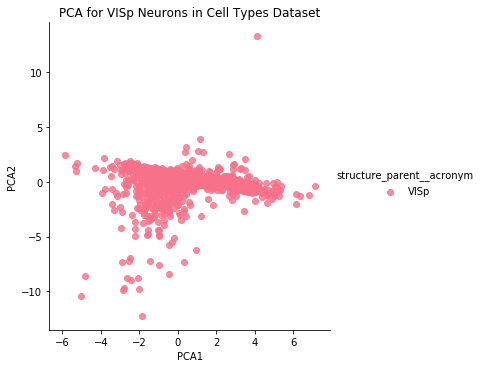

In [88]:
visp_data = visp_features.drop('structure_parent__acronym',axis=1)
visp_data = (visp_data - visp_data.mean())/visp_data.std()
pca = PCA(n_components = 2)           
VISP_2D = pca.fit_transform(visp_data)  
visp_features['PCA1'] = VISP_2D[:, 0]
visp_features['PCA2'] = VISP_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_features, fit_reg=False, palette="husl")
sns.set_palette('Paired')
plt.title('PCA for VISp Neurons in Cell Types Dataset')
plt.show()
plt.show()

Performing PCA on the VISpm dataframe.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


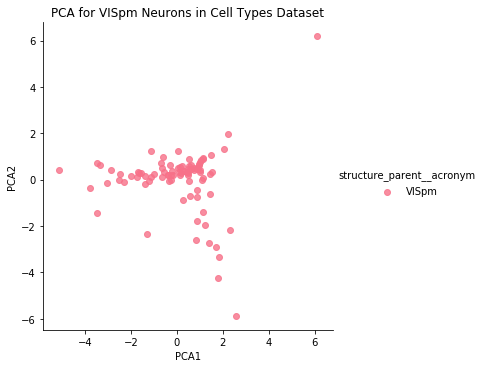

In [89]:
vispm_data = vispm_features.drop('structure_parent__acronym',axis=1)
vispm_data = (vispm_data - vispm_data.mean())/vispm_data.std()
pca = PCA(n_components = 2)           
VISPM_2D = pca.fit_transform(vispm_data)  
vispm_features['PCA1'] = VISPM_2D[:, 0]
vispm_features['PCA2'] = VISPM_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=vispm_features, fit_reg=False, palette="husl")
plt.title('PCA for VISpm Neurons in Cell Types Dataset')
plt.show()

PCA for VISp and VISpm

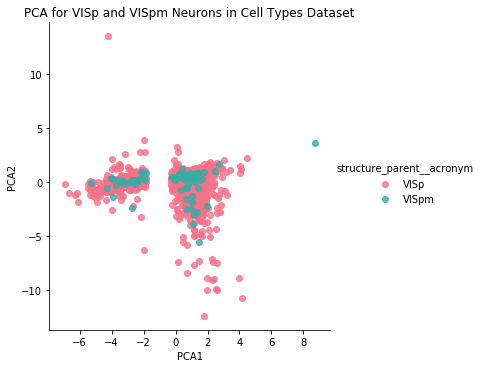

In [91]:
visp_and_m_data = visp_and_m_features.drop('structure_parent__acronym',axis=1)
visp_and_m_data = (visp_and_m_data - visp_and_m_data.mean())/visp_and_m_data.std()
pca = PCA(n_components = 2)           
VISPM_2D = pca.fit_transform(visp_and_m_data)  
visp_and_m_features['PCA1'] = VISPM_2D[:, 0]
visp_and_m_features['PCA2'] = VISPM_2D[:, 1]
sns.lmplot("PCA1", "PCA2",hue='structure_parent__acronym', data=visp_and_m_features, fit_reg=False, palette="husl")
plt.title('PCA for VISp and VISpm Neurons in Cell Types Dataset')
plt.show()

K-Means Clustering of n=2 for VISp and VISpm combined data

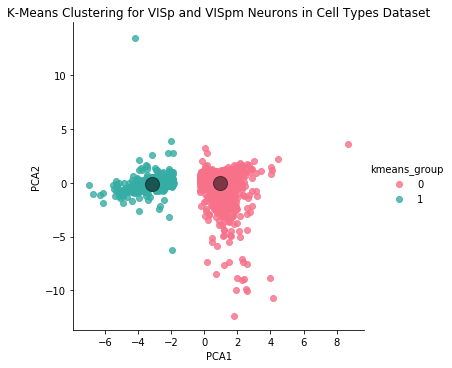

In [92]:
from sklearn.cluster import KMeans #Import the KMeans model

kmeans = KMeans(n_clusters=2) # Set up a kmeans model with 3 clusters

kmeans.fit(VISPM_2D) # Fit our two dimensional data
y_kmeans = kmeans.predict(VISPM_2D) 
visp_and_m_features['kmeans_group'] = y_kmeans

sns.lmplot("PCA1", "PCA2", hue='kmeans_group', data=visp_and_m_features, fit_reg=False, palette="husl")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering for VISp and VISpm Neurons in Cell Types Dataset')
plt.show()

Heatmap for VISp neurons

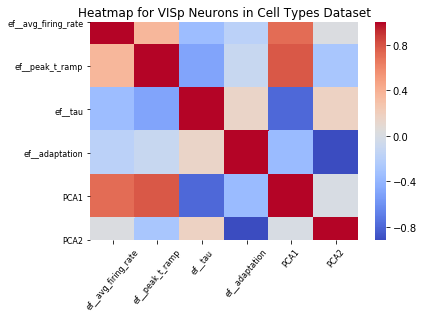

In [93]:
import seaborn as sns
s=sns.heatmap(visp_data.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=8)
s.set_xticklabels(s.get_xticklabels(),rotation=50,fontsize=8)
plt.title('Heatmap for VISp Neurons in Cell Types Dataset')
plt.show()

Heatmap for VISpm neurons

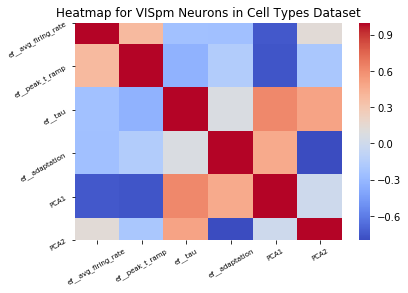

In [95]:
import seaborn as sns
s=sns.heatmap(vispm_data.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.title('Heatmap for VISpm Neurons in Cell Types Dataset')
plt.show()

Heatmap for VISp and VISpm

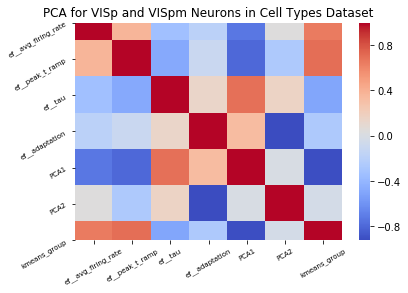

In [96]:
import seaborn as sns
s=sns.heatmap(visp_and_m_data.corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.title('PCA for VISp and VISpm Neurons in Cell Types Dataset')
plt.show()

Average Firing Rate for VISp and VISpm Units

We use the Dataarray da_visp created before to plot the average firing rate for each unit in VISp as a function of time

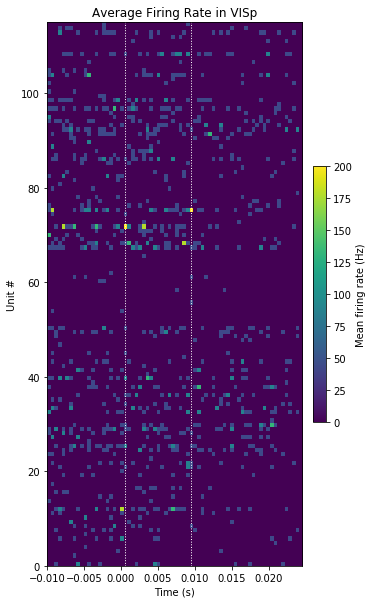

In [75]:
def plot_optotagging_response(da_visp):

    plt.figure(figsize=(5,10))

    plt.imshow(da_visp.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')
    plt.title('Average Firing Rate in VISp')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_visp)
plt.show()

We use the Dataarray da_vispm created before to plot the average firing rate for each unit in VISp as a function of time

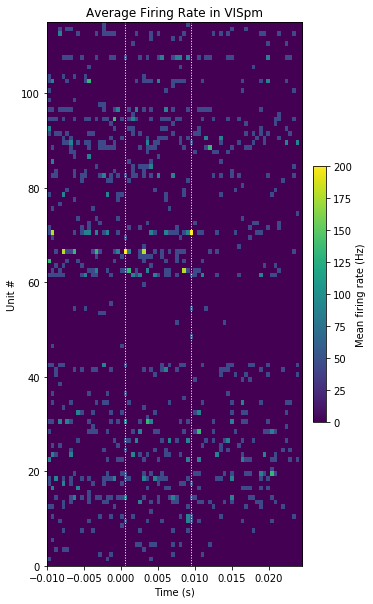

In [39]:
def plot_optotagging_response(da_vispm):

    plt.figure(figsize=(5,10))

    plt.imshow(da_vispm.mean(dim='trial_id').T / time_resolution, 
               extent=[np.min(bin_edges), np.max(bin_edges),
                       0, len(units)],
               aspect='auto', vmin=0, vmax=200)    

    for bound in [0.0005, 0.0095]:
        plt.plot([bound, bound],[0, len(units)], ':', color='white', linewidth=1.0)

    plt.xlabel('Time (s)')
    plt.ylabel('Unit #')

    cb = plt.colorbar(fraction=0.046, pad=0.04)
    cb.set_label('Mean firing rate (Hz)')
    
plot_optotagging_response(da_vispm)
plt.title('Average Firing Rate in VISpm')
plt.show()

VISp and VISpm PV+ or PV- neurons

We compare the baseline and evoked rates and see a subset of units in VISp with a light-evoked increase in firing rate

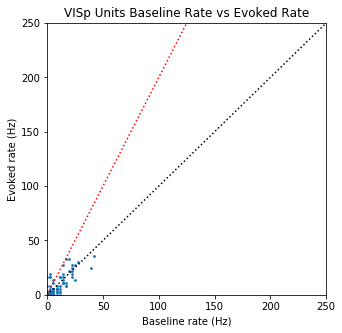

In [40]:
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_visp, evoked_rate_visp, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')
plt.title('VISp Units Baseline Rate vs Evoked Rate')
plt.show()

We compare the baseline and evoked rates and see a subset of units in VISpm with a light-evoked increase in firing rate

Text(0.5, 1.0, 'VISpm Baseline Rate vs Evoked Rate')

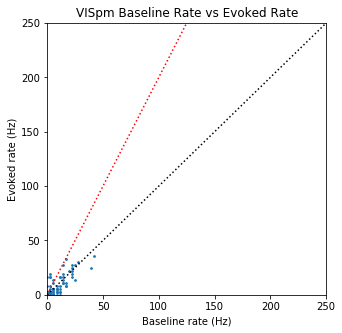

In [41]:
#We compared the baseline and evoked rates and saw a subset of units in VISpm with a light-evoked increase in firing rate
plt.figure(figsize=(5,5))

plt.scatter(baseline_rate_vispm, evoked_rate_vispm, s=3)

axis_limit = 250
plt.plot([0,axis_limit],[0,axis_limit], ':k')
plt.plot([0,axis_limit],[0,axis_limit*2], ':r')
plt.xlim([0,axis_limit])
plt.ylim([0,axis_limit])

plt.xlabel('Baseline rate (Hz)')
_ = plt.ylabel('Evoked rate (Hz)')

plt.title('VISpm Baseline Rate vs Evoked Rate')

Comparing Both Datasets, with data grouped by structure acronym, using a Violin plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


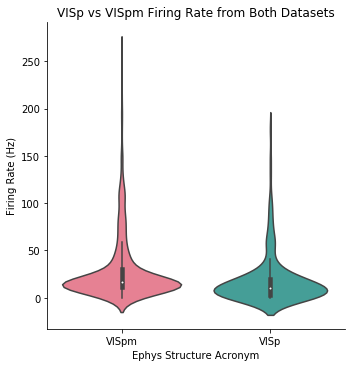

In [97]:
ax = sns.catplot(x="ecephys_structure_acronym", y="firing_rate",
            kind="violin", data=neuropix_and_celltypes, palette="husl");
ax.set(xlabel='Ephys Structure Acronym', ylabel='Firing Rate (Hz)', title = 'VISp vs VISpm Firing Rate from Both Datasets')
ax.set_xticklabels(['VISpm','VISp'])
plt.show()

Comparing the two datasets against each other

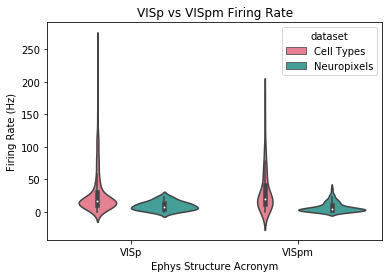

In [98]:
ax = sns.violinplot(x="ecephys_structure_acronym", y="firing_rate", hue="dataset",
                    data=specific_both, palette="husl")
ax.set(xlabel='Ephys Structure Acronym', ylabel='Firing Rate (Hz)', title = 'VISp vs VISpm Firing Rate')
ax.set_xticklabels(['VISp','VISpm'])
plt.show()

## Conclusion & Discussion

*Fill in your discussion information here*